# The MTA Turnstile EDA
### By Sarah Alabdulwahab

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The Metropolitan Transportation Authority (MTA) is North America's largest transportation network, covering a 5,000-square-mile travel area surrounding New York City through Long Island, southeastern New York State, and Connecticut.


The MTA is planning on adding more turnstiles to reduce the crowds of people in the busiest stations, therefore, my goal would be to find the best place to add them.


For this project, I chose to gather the data of the past four months to find the busiest station.

In [1]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

The purpose of this section is to familarize myself with the dataset.

In [2]:
#collecting the data
def get_data(dates):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for date in dates:
        file_url = url.format(date)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)

In [3]:
#the dates of (approx.) the past four months
dates = [210605, 210612, 210619, 210626, 
         210703, 210710, 210717, 210724, 
         210731, 210807, 210814, 210821, 
         210828, 210904, 210911, 210918]

In [4]:
#creating the database -> empty
engine = create_engine('sqlite:///C:/Users/Sarah/Desktop/SDAIA/MTA_turnstile.db', echo=True)

In [5]:
#filling the database
sql.to_sql(get_data(dates), con=engine, name='MTA_turnstile',if_exists='replace',index=False)

In [6]:
#reading from the database
turnstiles_df = pd.read_sql_query("SELECT * FROM MTA_turnstile", engine);

2021-09-30 10:46:08,949 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-09-30 10:46:08,953 INFO sqlalchemy.engine.base.Engine ()
2021-09-30 10:46:08,954 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-09-30 10:46:08,955 INFO sqlalchemy.engine.base.Engine ()
2021-09-30 10:46:08,956 INFO sqlalchemy.engine.base.Engine SELECT * FROM MTA_turnstile
2021-09-30 10:46:08,957 INFO sqlalchemy.engine.base.Engine ()


In [7]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,00:00:00,REGULAR,7578734,2590325
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,04:00:00,REGULAR,7578740,2590327
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,08:00:00,REGULAR,7578749,2590340
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,12:00:00,REGULAR,7578789,2590386
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,16:00:00,REGULAR,7578897,2590418


In [8]:
#num of rows and columns
turnstiles_df.shape

(3351726, 11)

In [9]:
#descriptive statistics
turnstiles_df.describe()

,ENTRIES,EXITS
count,3.351726e+06,3.351726e+06
mean,4.159043e+07,3.325419e+07
std,2.183052e+08,1.918333e+08
min,0.000000e+00,0.000000e+00
25%,2.186650e+05,1.006620e+05
50%,1.402711e+06,8.538525e+05
75%,6.010322e+06,3.970752e+06
max,2.147417e+09,2.133797e+09


In [10]:
#summary of data
turnstiles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351726 entries, 0 to 3351725
Data columns (total 11 columns):
C/A                                                                     object
UNIT                                                                    object
SCP                                                                     object
STATION                                                                 object
LINENAME                                                                object
DIVISION                                                                object
DATE                                                                    object
TIME                                                                    object
DESC                                                                    object
ENTRIES                                                                 int64
EXITS                                                                   int64
dtypes: int64(2), ob

In [11]:
#checking for null values
turnstiles_df.isna().sum()

C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
dtype: int64

In [12]:
#the column names -> without white spaces
turnstiles_df.columns = turnstiles_df.columns.str.strip()
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [13]:
#number of stations
turnstiles_df.STATION.nunique()

379

In [14]:
#four months of data
turnstiles_df.DATE.value_counts().sort_index()

05/29/2021    29939
05/30/2021    29812
05/31/2021    29997
06/01/2021    29889
06/02/2021    29870
              ...  
09/13/2021    30103
09/14/2021    30292
09/15/2021    29833
09/16/2021    29928
09/17/2021    29884
Name: DATE, Length: 112, dtype: int64

### Data Cleaning & Feature Engineering

In [15]:
#convert the DATE to datetime 
turnstiles_df["DATE"] = pd.to_datetime(turnstiles_df.DATE)

In [16]:
#looking for duplicated rows
turnstiles_df[['C/A','UNIT', 'SCP', 'STATION', 'DATE', 'TIME']].duplicated().sum()

112

In [17]:
#dropping duplicates
turnstiles_df.drop_duplicates(subset=['C/A','UNIT', 'SCP', 'STATION', 'DATE', 'TIME'], inplace=True)

In [18]:
#drop DESC & DIVISION columns because i will not be needing them for my analysis
turnstiles_df.drop(['DESC', 'DIVISION','LINENAME', 'TIME'], axis=1, inplace=True)

In [19]:
#reset index after dropping
turnstiles_df.reset_index(drop=True, inplace=True)

In [20]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,2021-05-29,7578734,2590325
1,A002,R051,02-00-00,59 ST,2021-05-29,7578740,2590327
2,A002,R051,02-00-00,59 ST,2021-05-29,7578749,2590340
3,A002,R051,02-00-00,59 ST,2021-05-29,7578789,2590386
4,A002,R051,02-00-00,59 ST,2021-05-29,7578897,2590418


### Unique Turnstile
Each turnstile is identified by the combination of C/A, Unit, SCP, and the station.

In [21]:
turnstiles_df['UNIQUE_TURNSTILE'] = (turnstiles_df["C/A"] + turnstiles_df["UNIT"] + 
                                     turnstiles_df["SCP"] + turnstiles_df["STATION"])

In [22]:
#number of turnstiles
turnstiles_df.UNIQUE_TURNSTILE.nunique()

5032

In [23]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,UNIQUE_TURNSTILE
0,A002,R051,02-00-00,59 ST,2021-05-29,7578734,2590325,A002R05102-00-0059 ST
1,A002,R051,02-00-00,59 ST,2021-05-29,7578740,2590327,A002R05102-00-0059 ST
2,A002,R051,02-00-00,59 ST,2021-05-29,7578749,2590340,A002R05102-00-0059 ST
3,A002,R051,02-00-00,59 ST,2021-05-29,7578789,2590386,A002R05102-00-0059 ST
4,A002,R051,02-00-00,59 ST,2021-05-29,7578897,2590418,A002R05102-00-0059 ST


### Daily Entries & Exits

For each unique turnstile.

In [24]:
#cummulative entries and exits
turnstiles_daily = (turnstiles_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                    ['ENTRIES','EXITS'].max())

In [25]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,2021-05-29,7579021,2590439
1,A002,R051,02-00-00,59 ST,2021-05-30,7579275,2590548
2,A002,R051,02-00-00,59 ST,2021-05-31,7579593,2590641
3,A002,R051,02-00-00,59 ST,2021-06-01,7580178,2590917
4,A002,R051,02-00-00,59 ST,2021-06-02,7580754,2591200


Adding Columns: `PREV_DATE`, `PREV_ENTRIES`, and `PREV_EXITS`.

In [26]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])
                                                                 ["DATE", "ENTRIES","EXITS"]
                                                       .apply(lambda grp: grp.shift(1)))

In [27]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
0,A002,R051,02-00-00,59 ST,2021-05-29,7579021,2590439,NaT,NaN,NaN
1,A002,R051,02-00-00,59 ST,2021-05-30,7579275,2590548,2021-05-29,7579021.0,2590439.0
2,A002,R051,02-00-00,59 ST,2021-05-31,7579593,2590641,2021-05-30,7579275.0,2590548.0
3,A002,R051,02-00-00,59 ST,2021-06-01,7580178,2590917,2021-05-31,7579593.0,2590641.0
4,A002,R051,02-00-00,59 ST,2021-06-02,7580754,2591200,2021-06-01,7580178.0,2590917.0


In [28]:
# Drop the rows for the earliest date in the df
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

#### Reverse Entries & Exits
Need to investigate the reversed data and fix it.

In [29]:
turnstiles_daily[(turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"])
                | (turnstiles_daily["EXITS"] < turnstiles_daily["PREV_EXITS"])].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
4369,A011,R080,01-03-00,57 ST-7 AV,2021-05-30,885601566,489576902,2021-05-29,885601748.0,489577552.0
4370,A011,R080,01-03-00,57 ST-7 AV,2021-05-31,885601403,489576371,2021-05-30,885601566.0,489576902.0
4371,A011,R080,01-03-00,57 ST-7 AV,2021-06-01,885601292,489575869,2021-05-31,885601403.0,489576371.0
4372,A011,R080,01-03-00,57 ST-7 AV,2021-06-02,885601049,489575017,2021-06-01,885601292.0,489575869.0
4373,A011,R080,01-03-00,57 ST-7 AV,2021-06-03,885600810,489574126,2021-06-02,885601049.0,489575017.0


In [30]:
#function to calculate the daily entries 
def get_daily_entries(row, max_entries):
    num = abs(row["ENTRIES"] - row["PREV_ENTRIES"])
    
    #could be reset to a random number
    if num > max_entries:
        return 0
    
    return num

In [31]:
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_entries, axis=1, max_entries=100000)

In [32]:
#function to calculate the daily exits 
def get_daily_exits(row, max_exits):
    num = abs(row["EXITS"] - row["PREV_EXITS"])
    
    #could be reset to a random number
    if num > max_exits:
        return 0
    
    return num

In [33]:
turnstiles_daily["DAILY_EXITS"] = turnstiles_daily.apply(get_daily_exits, axis=1, max_exits=100000)

In [34]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS
1,A002,R051,02-00-00,59 ST,2021-05-30,7579275,2590548,2021-05-29,7579021.0,2590439.0,254.0,109.0
2,A002,R051,02-00-00,59 ST,2021-05-31,7579593,2590641,2021-05-30,7579275.0,2590548.0,318.0,93.0
3,A002,R051,02-00-00,59 ST,2021-06-01,7580178,2590917,2021-05-31,7579593.0,2590641.0,585.0,276.0
4,A002,R051,02-00-00,59 ST,2021-06-02,7580754,2591200,2021-06-01,7580178.0,2590917.0,576.0,283.0
5,A002,R051,02-00-00,59 ST,2021-06-03,7581328,2591445,2021-06-02,7580754.0,2591200.0,574.0,245.0


<a id='eda'></a>
# Exploratory Data Analysis

### Daily Entries & Exits For Each Station

In [35]:
station_daily = turnstiles_daily.groupby(["STATION", "DATE"], as_index = False)[['DAILY_ENTRIES','DAILY_EXITS']].sum()
station_daily.head()

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS
0,1 AV,2021-05-30,4575.0,8830.0
1,1 AV,2021-05-31,4943.0,8936.0
2,1 AV,2021-06-01,7487.0,12730.0
3,1 AV,2021-06-02,7993.0,13067.0
4,1 AV,2021-06-03,7844.0,13031.0


In [36]:
#the total traffic in a station is the sum of entries and exits
station_daily['TOTAL'] = station_daily.DAILY_ENTRIES + station_daily.DAILY_EXITS

In [37]:
station_daily.head()

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,TOTAL
0,1 AV,2021-05-30,4575.0,8830.0,13405.0
1,1 AV,2021-05-31,4943.0,8936.0,13879.0
2,1 AV,2021-06-01,7487.0,12730.0,20217.0
3,1 AV,2021-06-02,7993.0,13067.0,21060.0
4,1 AV,2021-06-03,7844.0,13031.0,20875.0


### Stations with the Highest Daily Entries

In [38]:
station_entries = station_daily.groupby('STATION')['DAILY_ENTRIES'].sum().sort_values(ascending=False)
station_entries.head(10)

STATION
34 ST-PENN STA     4893954.0
34 ST-HERALD SQ    3760882.0
GRD CNTRL-42 ST    3513460.0
42 ST-PORT AUTH    3332572.0
86 ST              3198710.0
23 ST              3187259.0
14 ST-UNION SQ     3045658.0
125 ST             3044055.0
TIMES SQ-42 ST     2736867.0
PATH NEW WTC       2641813.0
Name: DAILY_ENTRIES, dtype: float64

#### Top 10 Stations with the Highest Daily Entries

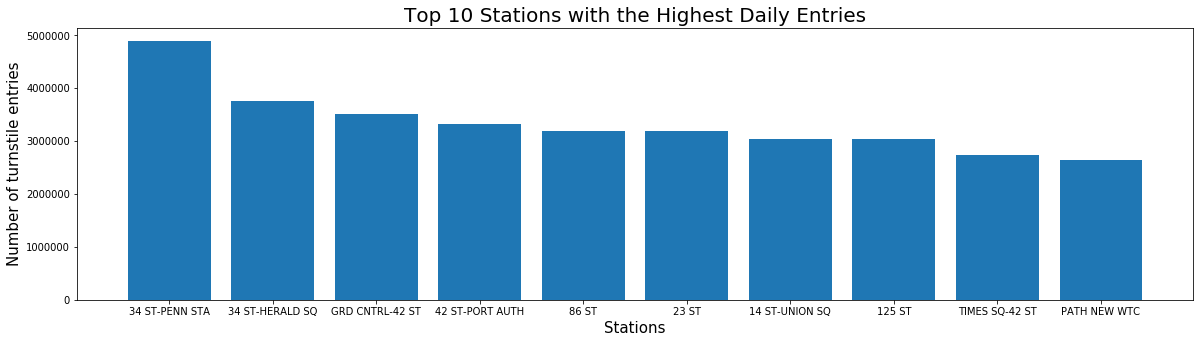

In [39]:
plt.figure(figsize=(20,5))
plt.bar(x=station_entries.index[:10], height=station_entries[:10])
plt.xlabel('Stations', fontsize=15)
plt.ylabel('Number of turnstile entries', fontsize=15)
plt.title('Top 10 Stations with the Highest Daily Entries', fontsize=20);

### Stations with the Highest Daily Exits

In [40]:
station_exits = station_daily.groupby('STATION')['DAILY_EXITS'].sum().sort_values(ascending=False)
station_exits.head(10)

STATION
34 ST-PENN STA     6554273.0
GRD CNTRL-42 ST    5084956.0
34 ST-HERALD SQ    5030650.0
14 ST-UNION SQ     4414206.0
86 ST              4411253.0
42 ST-PORT AUTH    4081519.0
125 ST             3818434.0
TIMES SQ-42 ST     3784189.0
23 ST              3723680.0
FULTON ST          3403336.0
Name: DAILY_EXITS, dtype: float64

#### Top 10 Stations with the Highest Daily Exits

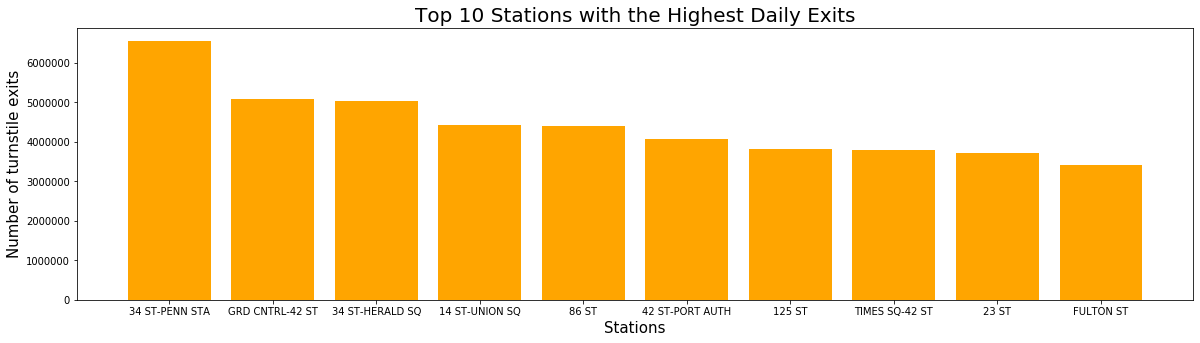

In [41]:
plt.figure(figsize=(20,5))
plt.bar(x=station_exits.index[:10], height=station_exits[:10], color='orange')
plt.xlabel('Stations', fontsize=15)
plt.ylabel('Number of turnstile exits', fontsize=15)
plt.title('Top 10 Stations with the Highest Daily Exits', fontsize=20);

### Stations with the Highest Daily Traffic

In [42]:
station_totals = station_daily.groupby('STATION')['TOTAL'].sum().sort_values(ascending=False)
station_totals.head(10)

STATION
34 ST-PENN STA     11448227.0
34 ST-HERALD SQ     8791532.0
GRD CNTRL-42 ST     8598416.0
86 ST               7609963.0
14 ST-UNION SQ      7459864.0
42 ST-PORT AUTH     7414091.0
23 ST               6910939.0
125 ST              6862489.0
TIMES SQ-42 ST      6521056.0
FULTON ST           6005811.0
Name: TOTAL, dtype: float64

#### Top 10 Stations with the Highest Daily Traffic

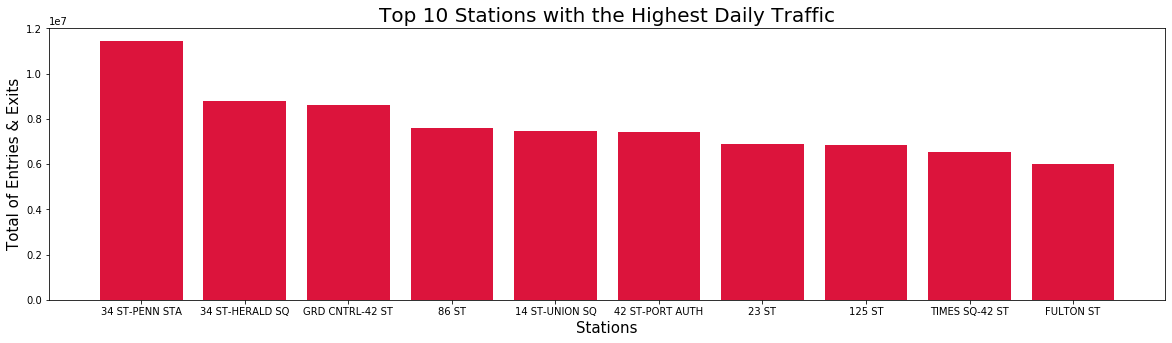

In [43]:
plt.figure(figsize=(20,5))
plt.bar(x=station_totals.index[:10], height=station_totals[:10], color='crimson')
plt.xlabel('Stations', fontsize=15)
plt.ylabel('Total of Entries & Exits', fontsize=15)
plt.title('Top 10 Stations with the Highest Daily Traffic', fontsize=20);

### Top Stations Comparison

In [44]:
stations_all = station_daily.groupby('STATION',as_index = False).sum().sort_values('TOTAL',ascending=False).reset_index(drop=True)
stations_all

,STATION,DAILY_ENTRIES,DAILY_EXITS,TOTAL
0,34 ST-PENN STA,4893954.0,6554273.0,11448227.0
1,34 ST-HERALD SQ,3760882.0,5030650.0,8791532.0
2,GRD CNTRL-42 ST,3513460.0,5084956.0,8598416.0
3,86 ST,3198710.0,4411253.0,7609963.0
4,14 ST-UNION SQ,3045658.0,4414206.0,7459864.0
...,...,...,...,...
374,BEACH 98 ST,23608.0,36772.0,60380.0
375,BEACH 105 ST,15757.0,26237.0,41994.0
376,TOMPKINSVILLE,31864.0,2.0,31866.0
377,BROAD CHANNEL,12793.0,7861.0,20654.0


#### Top 10 Total VS Entries VS Exits per Station

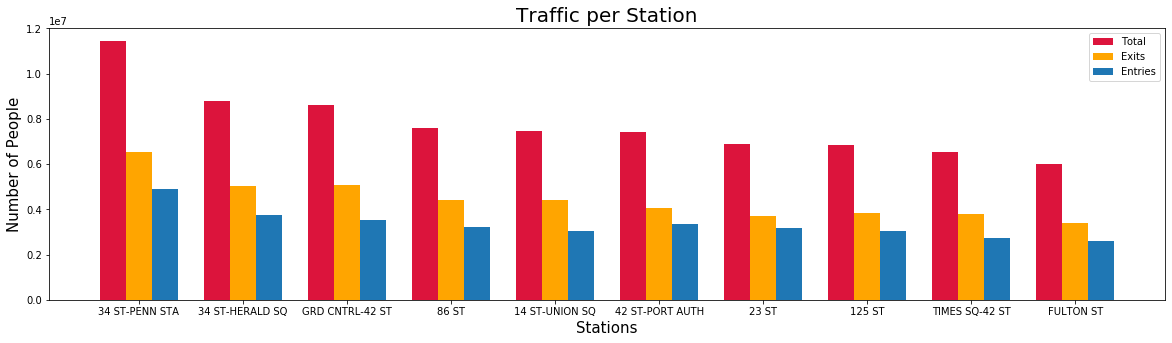

In [45]:
ind = np.arange(10) 
width = 0.25
plt.figure(figsize=(20,5)) 
 
bar1 = plt.bar(ind, stations_all.TOTAL[:10], width, color = 'crimson')
bar2 = plt.bar(ind+width, stations_all.DAILY_EXITS[:10], width, color='orange')
bar3 = plt.bar(ind+width*2, stations_all.DAILY_ENTRIES[:10], width)
  
plt.xlabel("Stations", fontsize=15)
plt.ylabel('Number of People', fontsize=15)
plt.title("Traffic per Station", fontsize=20)

plt.xticks(ind+width,stations_all.STATION[:10])
plt.legend((bar1, bar2, bar3),('Total', 'Exits', 'Entries'))
plt.show();

### Top 10 Stations Daily

In [46]:
top_stations = list(stations_all.STATION[:10])
top_stations_daily = station_daily[(station_daily.STATION == top_stations[0])
                                   |(station_daily.STATION == top_stations[1])
                                   |(station_daily.STATION == top_stations[2])
                                   |(station_daily.STATION == top_stations[3])
                                   |(station_daily.STATION == top_stations[4])
                                   |(station_daily.STATION == top_stations[5])
                                   |(station_daily.STATION == top_stations[6])
                                   |(station_daily.STATION == top_stations[7])
                                   |(station_daily.STATION == top_stations[8])
                                   |(station_daily.STATION == top_stations[9])]
top_stations_daily.STATION.value_counts().index

Index(['34 ST-PENN STA', '34 ST-HERALD SQ', 'TIMES SQ-42 ST', '125 ST',
       '86 ST', '42 ST-PORT AUTH', 'GRD CNTRL-42 ST', '14 ST-UNION SQ',
       '23 ST', 'FULTON ST'],
      dtype='object')

In [47]:
top_stations_daily

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,TOTAL
999,125 ST,2021-05-30,14269.0,20181.0,34450.0
1000,125 ST,2021-05-31,18372.0,24021.0,42393.0
1001,125 ST,2021-06-01,30012.0,36055.0,66067.0
1002,125 ST,2021-06-02,30748.0,36784.0,67532.0
1003,125 ST,2021-06-03,29174.0,34890.0,64064.0
...,...,...,...,...,...
39260,TIMES SQ-42 ST,2021-09-13,28832.0,40016.0,68848.0
39261,TIMES SQ-42 ST,2021-09-14,30344.0,42119.0,72463.0
39262,TIMES SQ-42 ST,2021-09-15,31647.0,41689.0,73336.0
39263,TIMES SQ-42 ST,2021-09-16,28532.0,38668.0,67200.0


In [48]:
green = sns.color_palette()[2]

In [49]:
top_stations_daily

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,TOTAL
999,125 ST,2021-05-30,14269.0,20181.0,34450.0
1000,125 ST,2021-05-31,18372.0,24021.0,42393.0
1001,125 ST,2021-06-01,30012.0,36055.0,66067.0
1002,125 ST,2021-06-02,30748.0,36784.0,67532.0
1003,125 ST,2021-06-03,29174.0,34890.0,64064.0
...,...,...,...,...,...
39260,TIMES SQ-42 ST,2021-09-13,28832.0,40016.0,68848.0
39261,TIMES SQ-42 ST,2021-09-14,30344.0,42119.0,72463.0
39262,TIMES SQ-42 ST,2021-09-15,31647.0,41689.0,73336.0
39263,TIMES SQ-42 ST,2021-09-16,28532.0,38668.0,67200.0


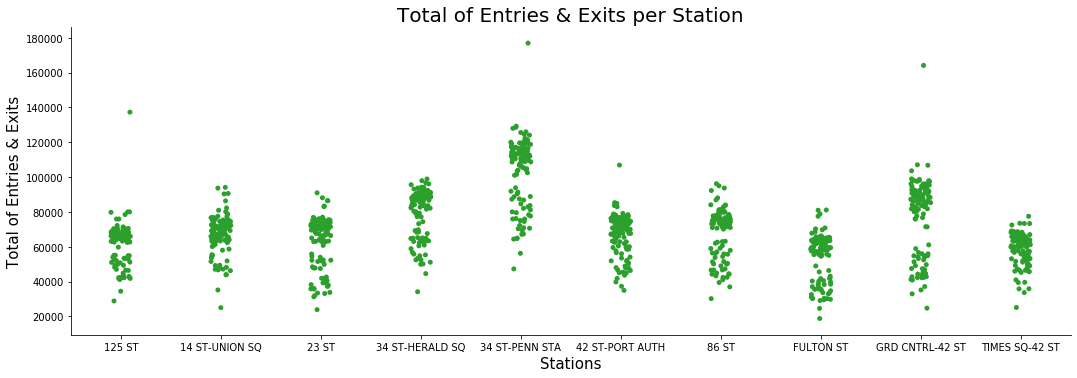

In [50]:
sns.catplot(y='TOTAL', x='STATION', data=top_stations_daily, color=green, height=5, aspect=3)
plt.xlabel("Stations", fontsize=15)
plt.ylabel('Total of Entries & Exits', fontsize=15)
plt.title("Total of Entries & Exits per Station", fontsize=20);

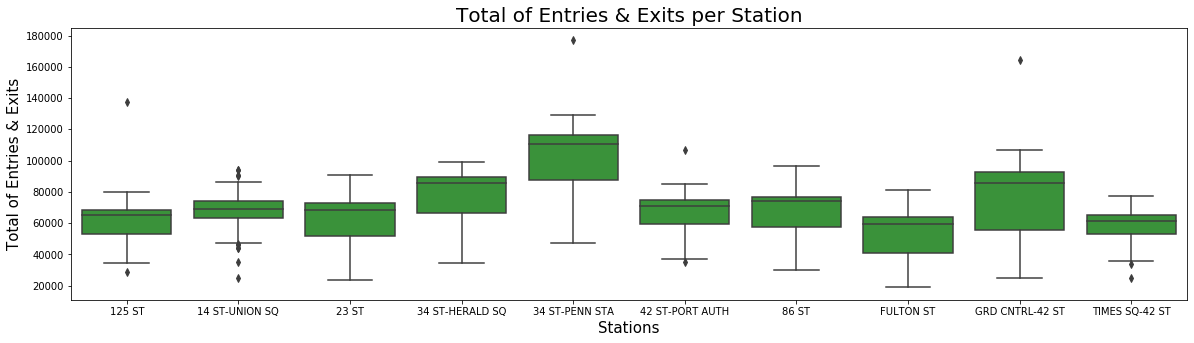

In [51]:
#boxplots show more details -> min, max, outliers, and quartiles
plt.figure(figsize=(20,5))
sns.boxplot(y='TOTAL', x='STATION', data=top_stations_daily, color=green)
plt.xlabel("Stations", fontsize=15)
plt.ylabel('Total of Entries & Exits', fontsize=15)
plt.title("Total of Entries & Exits per Station", fontsize=20);

### Unique Turnstile Per Station

In [52]:
turnstiles_per_station = turnstiles_df.groupby(['STATION'])["UNIQUE_TURNSTILE"].nunique()

In [53]:
turnstiles_per_station.sort_values(ascending=False, inplace=True)

In [54]:
turnstiles_per_station

STATION
34 ST-PENN STA     102
FULTON ST           96
GRD CNTRL-42 ST     94
23 ST               73
86 ST               65
                  ... 
HARLEM 148 ST        3
190 ST               3
ATLANTIC AV          3
CLEVELAND ST         2
SUTTER AV            2
Name: UNIQUE_TURNSTILE, Length: 379, dtype: int64

#### Top 10 Total Unique Turnstile Per Station

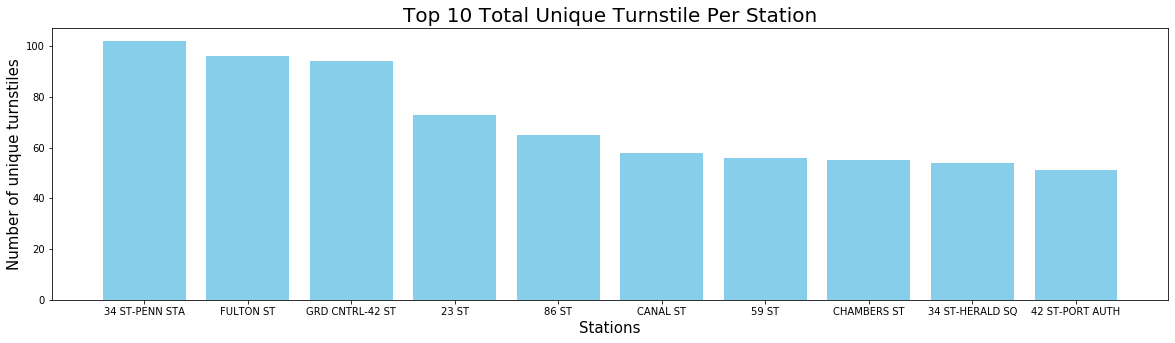

In [55]:
plt.figure(figsize=(20,5))
plt.bar(x=turnstiles_per_station.index[:10], height=turnstiles_per_station[:10], color='skyblue');
plt.xlabel('Stations', fontsize=15)
plt.ylabel('Number of unique turnstiles', fontsize=15)
plt.title('Top 10 Total Unique Turnstile Per Station', fontsize=20);

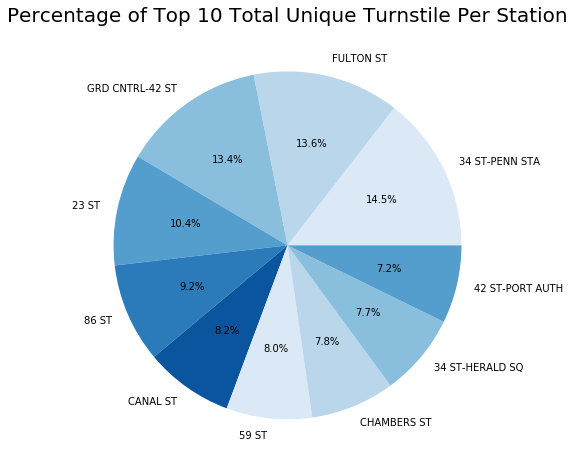

In [56]:
#Percentage
plt.figure(figsize=(8, 8))
plt.pie(turnstiles_per_station[:10], labels = turnstiles_per_station.index[:10], 
        colors = sns.color_palette('Blues')[:10], autopct='%.1f%%');
plt.title('Percentage of Top 10 Total Unique Turnstile Per Station', fontsize=20);

### Daily Entries VS Daily Exits

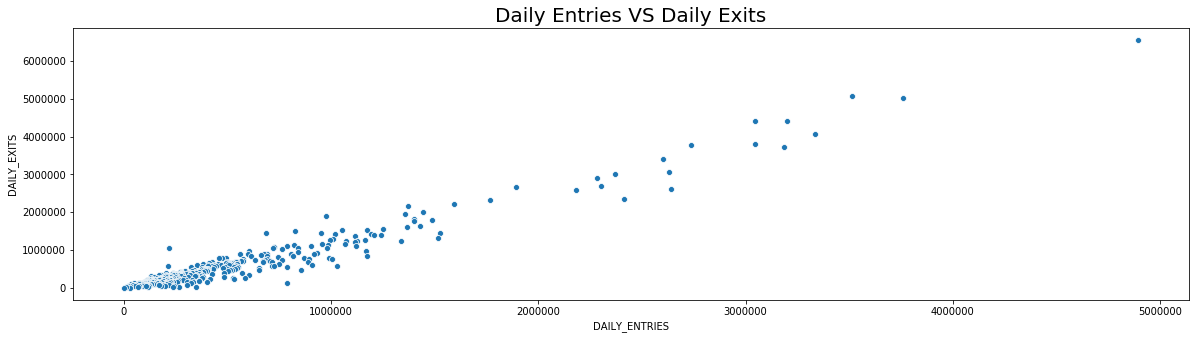

In [57]:
plt.figure(figsize=(20,5))
sns.scatterplot(data=stations_all, x="DAILY_ENTRIES", y="DAILY_EXITS")
plt.title('Daily Entries VS Daily Exits', fontsize=20);

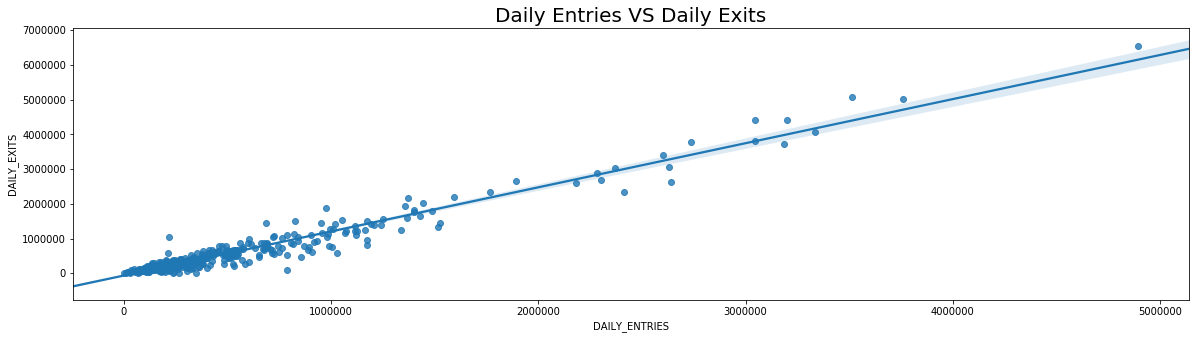

In [58]:
plt.figure(figsize=(20,5))
sns.regplot(data=stations_all, x="DAILY_ENTRIES", y="DAILY_EXITS");
plt.title('Daily Entries VS Daily Exits', fontsize=20);

<a id='conclusions'></a>
# Conclusions

If the MTA is focusing on reducing the daily traffic of entries and exits, then more turnstiles should be added 34 ST-PENN STA, 34 ST-HERALD SQ, and GRD CNTRL-42 ST.

However, if we take a look at the number of turnstiles for each of these stations, we can notice that 34 ST-HERALD SQ has nearly half the amount of turnstiles that 34 ST-PENN STA and GRD CNTRL-42 ST have. In this case, 34 ST-HERALD SQ should be prioritized.

In [59]:
#saved for visualizations in Tableau
#stations_all.to_csv("stations_all.csv")
#top_stations_daily.to_csv("top_stations_daily.csv")
#turnstiles_per_station.to_csv("turnstiles_per_station.csv")